In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [18]:
it_tf_tensorFlow = pd.read_csv('output_tc_tf.csv')
it_tf_pytorch    = pd.read_csv('output_tc_torch.csv')

In [19]:
it_tf_tensorFlow

,filename,line_count,tc_min,tc_max,tc_avg
0,..\Data\Models\TensorFlow\NLP\BERT\bert_model.py,722,0.000000,1.000000,0.076079
1,..\Data\Models\TensorFlow\CV\Inception.py,382,0.000000,1.000000,0.508092
2,..\Data\Models\TensorFlow\CV\ResNet.py,339,0.000000,1.000000,0.134418
3,..\Data\Models\TensorFlow\CV\VGG.py,261,0.151515,1.000000,0.394754
4,..\Data\Models\TensorFlow\SR\DeepSpeech2,478,0.590736,0.354504,0.097416
5,..\Data\Models\TensorFlow\NLP\GNMT,3134,1.000000,0.984563,0.101785
6,..\Data\Models\TensorFlow\SR\tacotron2,1201,1.000000,0.817104,0.183507


In [20]:
def model_naming(df, col_name):
    df[col_name] = df['filename'].apply(lambda x: x.split('\\')[-1])
    return df
it_tf_tensorFlow = model_naming(it_tf_tensorFlow, 'model_name')
it_tf_pytorch    = model_naming(it_tf_pytorch, 'model_name')


In [21]:
def generate_graphs(df_tensorFlow, df_pytorch, col_model_name, col_metric_name):
    import numpy as np
    import matplotlib.pyplot as plt

    # Data for macro and micro averages
    models = df_tensorFlow[col_model_name]
    macro_avg_tf = df_tensorFlow[col_metric_name]
    macro_avg_torch = df_pytorch[col_metric_name]
    # micro_avg = df['itid_micro_avg']
    # itid_min = df['itid_min']
    # itid_max = df['itid_max']

    # Setting the figure size and plotting the bar plots side by side
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.2
    index = np.arange(len(models))

    # Plotting the macro average
    rects1 = ax.bar(index, macro_avg_tf, bar_width, label=col_metric_name +" "+'Tensorflow')

    # Plotting the micro average
    rects2 = ax.bar(index + bar_width, macro_avg_torch, bar_width, label=col_metric_name +" "+ 'Pytorch')

    # # Plotting the minimum values
    # rects3 = ax.bar(index + 2 * bar_width, itid_min, bar_width, label='Min Value', color='r')

    # # Plotting the maximum values
    # rects4 = ax.bar(index + 3 * bar_width, itid_max, bar_width, label='Max Value', color='g')

    # Adding labels, title, and legend
    ax.set_xlabel('Model Name')
    ax.set_ylabel('Textual Coherence Score')
    ax.set_title('Comparison of Textual Coherence Metrics for both TensorFlow and PyTorch Models')
    ax.set_xticks(index + 1.5 * bar_width)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()
    # Displaying the bar plot
    plt.show()

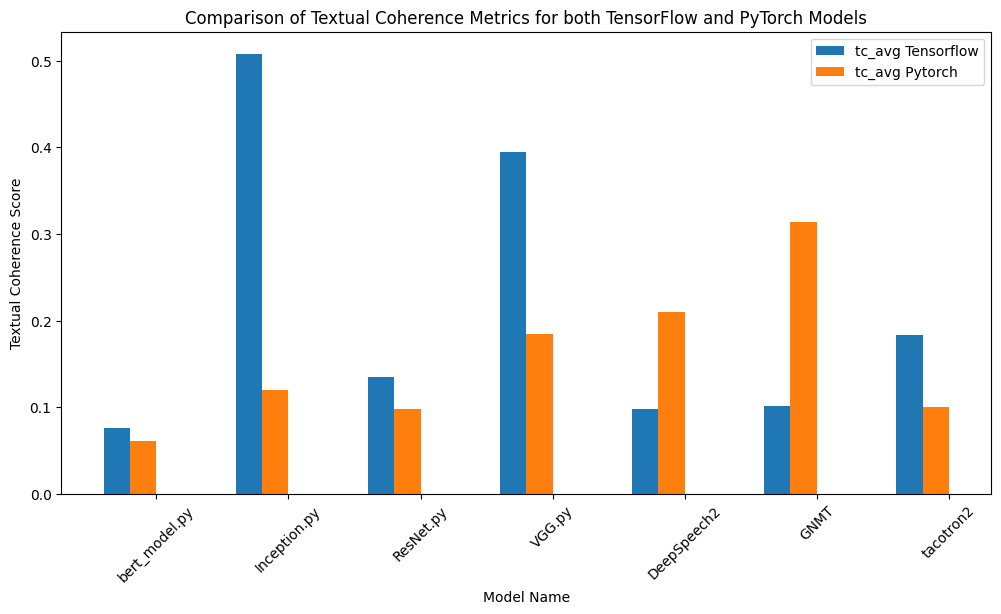

In [22]:
generate_graphs(it_tf_tensorFlow, it_tf_pytorch, 'model_name', 'tc_avg')

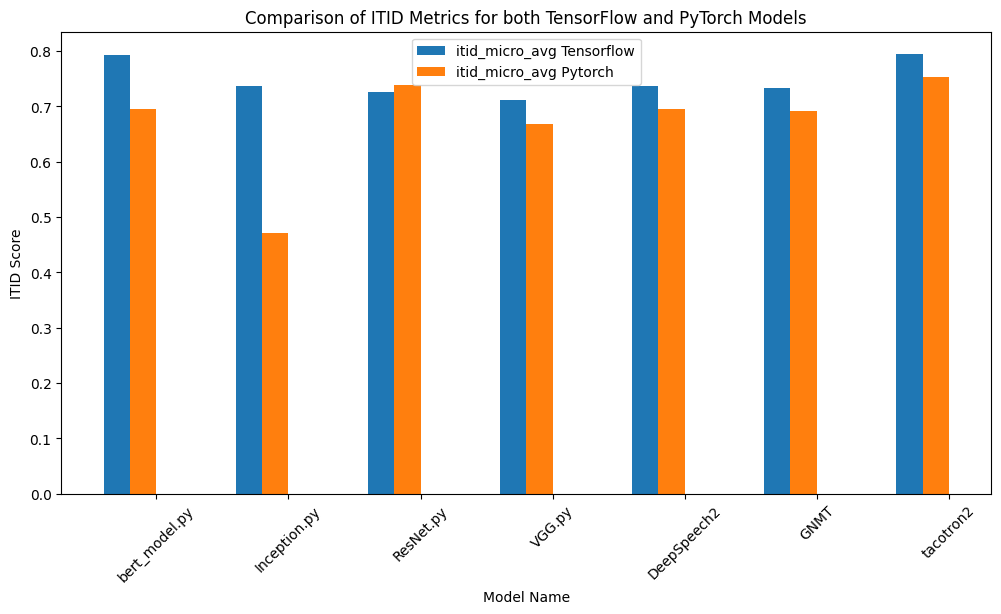

In [13]:
generate_graphs(it_tf_tensorFlow, it_tf_pytorch, 'model_name', 'itid_micro_avg')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data for macro and micro averages
# models = it_tf_tensorFlow['info']
# macro_avg = it_tf_tensorFlow['itid_macro_avg']
# micro_avg = it_tf_tensorFlow['itid_micro_avg']
# itid_min = it_tf_tensorFlow['itid_min']
# itid_max = it_tf_tensorFlow['itid_max']

# # Setting the figure size and plotting the bar plots side by side
# fig, ax = plt.subplots(figsize=(12, 6))
# bar_width = 0.2
# index = np.arange(len(models))

# # Plotting the macro average
# rects1 = ax.bar(index, macro_avg, bar_width, label='Macro Average')

# # Plotting the micro average
# rects2 = ax.bar(index + bar_width, micro_avg, bar_width, label='Micro Average')

# # Plotting the minimum values
# rects3 = ax.bar(index + 2 * bar_width, itid_min, bar_width, label='Min Value', color='r')

# # Plotting the maximum values
# rects4 = ax.bar(index + 3 * bar_width, itid_max, bar_width, label='Max Value', color='g')

# # Adding labels, title, and legend
# ax.set_xlabel('File_name (A Model Could have Multiple Models)')
# ax.set_ylabel('ITID Score')
# ax.set_title('Comparison of ITID Metrics for Tensorflow Models')
# ax.set_xticks(index + 1.5 * bar_width)
# ax.set_xticklabels(models, rotation=45)
# ax.legend()

# # Displaying the bar plot
# plt.show()
